
<div class="alert alert-block alert-info"><font size="5"><center><b><u> Sprint 15. Aprenentatge No Supervisat - Agrupació
\begin{align*}Marc\:Breysse\end{align*}</div>

<span style=color:blue>L'objectiu és familiaritzar-nos amb els algoritmes d'aprenentage no supervisats de Classificació</span>

<span style=color:blue>*K-means*</span>

<span style=color:blue>*Clustering jeràrquic*</span>

<span style=color:blue>*PCA - Principal Component Analysis*</span>

### <span style=color:blue>Classifica els diferents vols</span>

<span style=color:blue>*Anem a practicar i a familiaritzar-nos amb algoritmes de clustering*</span>

# <span style=color:darkblue>Nivell 1</span>

<u style=color:blue>Exercici 1:</u>

<span style=color:blue>Classifica els diferents vols utilitzant l'algoritme de K-means.</span>

In [ ]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split # Import train_test_split function

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset saved in Sprint11
DF = pd.read_csv('DelayedFlightsCleaned.csv')
DF.shape

(1928371, 14)

In [3]:
# to reduce cumputation time, we will reduce dataset to 100.000 first samples
DF = DF.iloc[0:10000, :]
DF.shape

(10000, 14)

In [4]:
DF.columns

Index(['Unnamed: 0', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay', 'DepDelay', 'TaxiIn',
       'TaxiOut', 'UniqueCarrier', 'Origin', 'Dest', 'Date'],
      dtype='object')

In [5]:
# we will drop numerical highly corralated variables 'CRS Departure Time', 'CRSElapsedTime', 'CRS Arrival Time','CRSElapsedTime', 'Departure Delay','DayOfWeek' and categorical variables 'Uniquecarrier' and 'Departure Airport'.
DF.drop(['Date','Unnamed: 0', 'CRSElapsedTime', 'ActualElapsedTime','TaxiIn',
       'TaxiOut'], axis='columns', inplace=True)

In [6]:
DF.head()

,DayOfWeek,CRSDepTime,CRSArrTime,ArrDelay,DepDelay,UniqueCarrier,Origin,Dest
0,4,1195,1345,-14.0,8.0,WN,IAD,TPA
1,4,455,600,2.0,19.0,WN,IAD,TPA
2,4,380,470,14.0,8.0,WN,IND,BWI
3,4,1075,1165,34.0,34.0,WN,IND,BWI
4,4,1155,1270,11.0,25.0,WN,IND,JAX


In [7]:
# Encoding categorical variables 'UniqueCarrier', 'Origin', 'Dest'
dummy_UniqueCarrier_type = pd.get_dummies(DF['UniqueCarrier'], prefix='UniqueCarrier', drop_first=True)
dummy_Origin_type = pd.get_dummies(DF['Origin'], prefix='Origin', drop_first=True)
dummy_Dest_type = pd.get_dummies(DF['Dest'], prefix='Dest', drop_first=True)

# Drop unnecessary columns
to_drop = ['UniqueCarrier','Origin','Dest']
DF.drop(to_drop, axis=1, inplace=True)

# Merge into a single data frame
DF = pd.concat([DF, dummy_UniqueCarrier_type, dummy_Origin_type, dummy_Dest_type], axis=1)
DF.shape

(10000, 131)

In [8]:
DF.head()

,DayOfWeek,CRSDepTime,CRSArrTime,ArrDelay,DepDelay,Origin_ALB,Origin_AMA,Origin_AUS,Origin_BDL,Origin_BHM,...,Dest_SEA,Dest_SFO,Dest_SJC,Dest_SLC,Dest_SMF,Dest_SNA,Dest_STL,Dest_TPA,Dest_TUL,Dest_TUS
0,4,1195,1345,-14.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,4,455,600,2.0,19.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,380,470,14.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1075,1165,34.0,34.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1155,1270,11.0,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Standardize numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(DF.iloc[:,:5])
DF.iloc[:,:5] = scaler.transform(DF.iloc[:,:5])
DF.head()

,DayOfWeek,CRSDepTime,CRSArrTime,ArrDelay,DepDelay,Origin_ALB,Origin_AMA,Origin_AUS,Origin_BDL,Origin_BHM,...,Dest_SEA,Dest_SFO,Dest_SJC,Dest_SLC,Dest_SMF,Dest_SNA,Dest_STL,Dest_TPA,Dest_TUL,Dest_TUS
0,-0.259318,1.211823,1.284114,-1.176977,-0.739389,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.259318,-1.865368,-1.483405,-0.740497,-0.419418,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.259318,-2.177246,-1.966328,-0.413137,-0.739389,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.259318,0.712819,0.615452,0.132464,0.016906,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.259318,1.045488,1.005505,-0.494977,-0.244889,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<span style=color:green><b>PCA for dimensionality reduction.</span>

In [10]:
from sklearn.decomposition import PCA

# minimum number of principal components such that 75% of the variance is retained
pca=PCA(.75)
pca.fit(DF)
DF_pca=pca.transform(DF) 
print("shape of X_pca", DF_pca.shape)

shape of X_pca (10000, 7)


In [11]:
# Explained variance
expl = pca.explained_variance_ratio_
print(expl)
print('sumaof 16 components:',sum(expl[0:16]))
# with 6 components, we have more than 70% of the variance explained

[0.32001204 0.22363147 0.14338474 0.03303655 0.01364905 0.01172788
 0.01090293]
sumaof 16 components: 0.7563446653809698


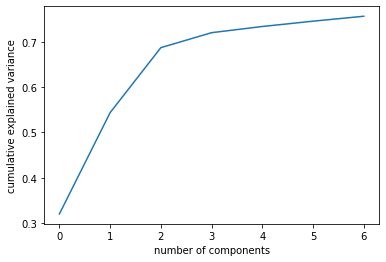

In [12]:
# Plot cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [13]:
# Reducción to 3 principal components with gives a variance of 69%

In [14]:
# Explained variance
expl = pca.explained_variance_ratio_
print(expl.round(3))
print('suma:',sum(expl[0:3].round(3)))

[0.32  0.224 0.143 0.033 0.014 0.012 0.011]
suma: 0.687


In [15]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(DF)
DF_pca = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])
DF_pca.head()

,pc1,pc2,pc3
0,-0.059671,-2.224767,0.299793
1,-2.103110,1.392108,0.023886
2,-2.431422,1.852985,-0.018413
3,0.613446,-0.681702,0.336171
4,0.420735,-1.469988,0.333456


<span style=color:green><b>K-MEANS.</span>

In [23]:
X = np.array(DF_pca)

In [24]:
# Kmeans algorithm
from sklearn.cluster import KMeans

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,

}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

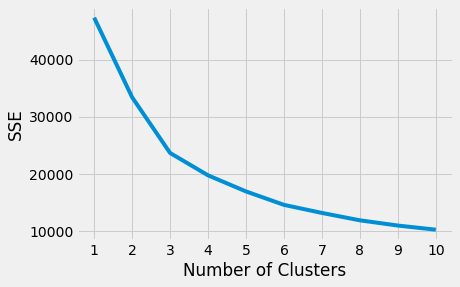

In [25]:
# Elbow Method for optimal value of k
from sklearn.cluster import KMeans

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [26]:
# KneeLocator for sweet spot where the SSE curve starts to bend known as the elbow point
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [27]:
# 3D plot of 3 clusters
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-1.19115674  0.71708105 -0.0132349 ]
 [ 0.40426672 -0.94657512 -0.00556265]
 [ 2.76914613  1.50331135  0.07609762]]


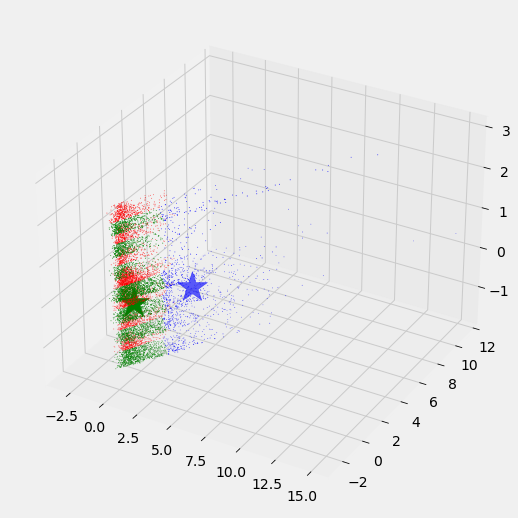

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Centroids
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=0.15)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

# <span style=color:darkblue>Nivell 2</span>

<u style=color:blue>Exercici 2:</u>

<span style=color:blue>Classifica els diferents vols utilitzant l'algoritme de clustering jeràrquic..<span>

In [20]:
# Create the Distance Matrix based on linkage
from scipy.cluster.hierarchy import fcluster, linkage

distance_matrix = linkage(X, method = 'ward', metric = 'euclidean')

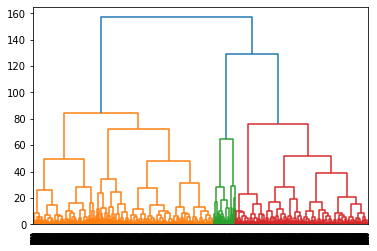

In [21]:
# Dendrograms to show progressions as clusters are merged
from scipy.cluster.hierarchy import dendrogram

dn = dendrogram(distance_matrix)
plt.show()

<span style=color:green>*From the dendrogram, the number of 3 Clusters looks like the best option.*</span>

# <span style=color:darkblue>Nivell 3</span>

<u style=color:blue>Exercici 3:</u>

<span style=color:blue>Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette..<span>


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.29698371934579865
For n_clusters = 3 The average silhouette_score is : 0.3261882021695928
For n_clusters = 4 The average silhouette_score is : 0.2885262835870371
For n_clusters = 5 The average silhouette_score is : 0.2935563069639053
For n_clusters = 6 The average silhouette_score is : 0.2737943362967039


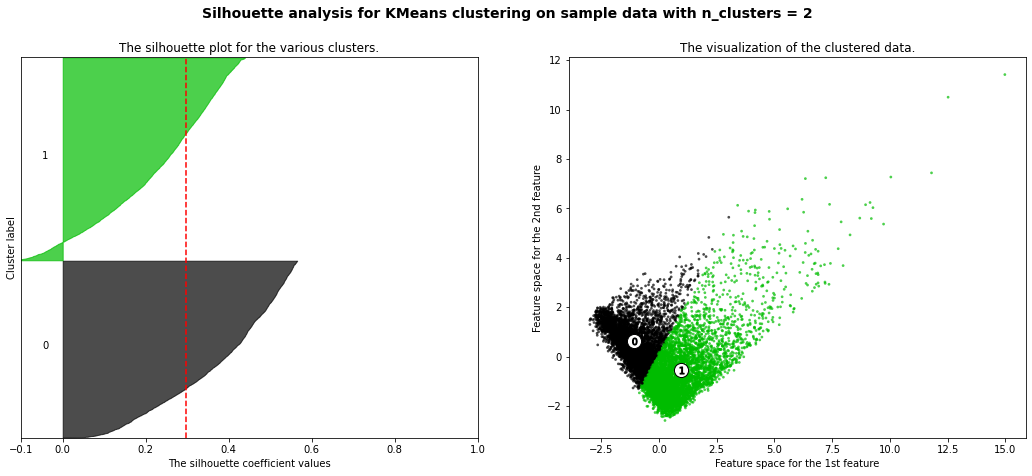

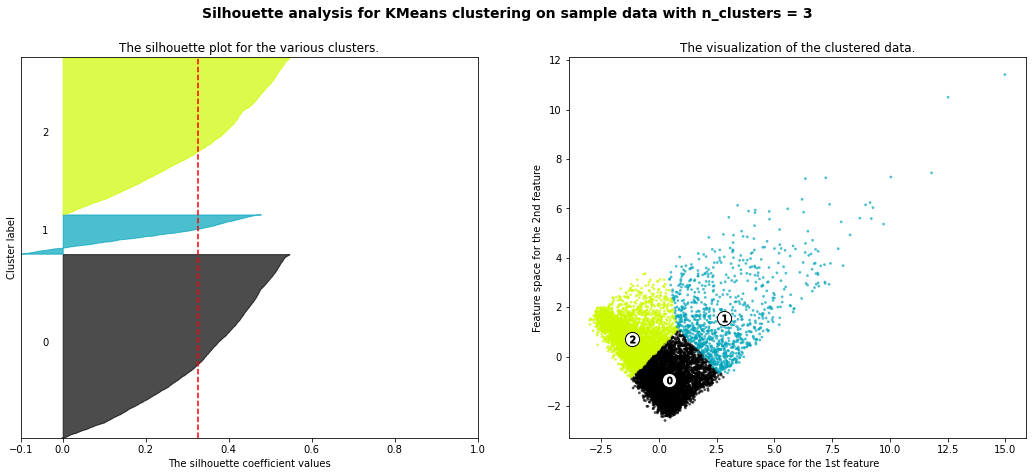

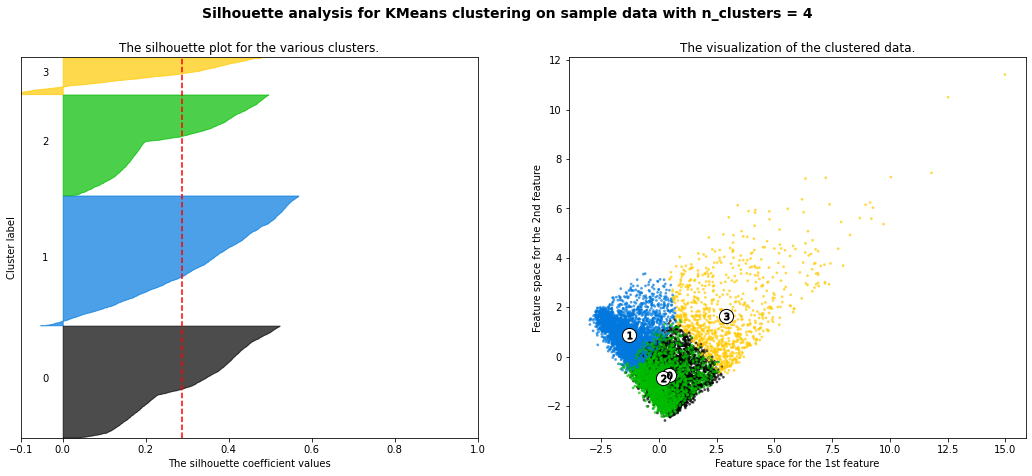

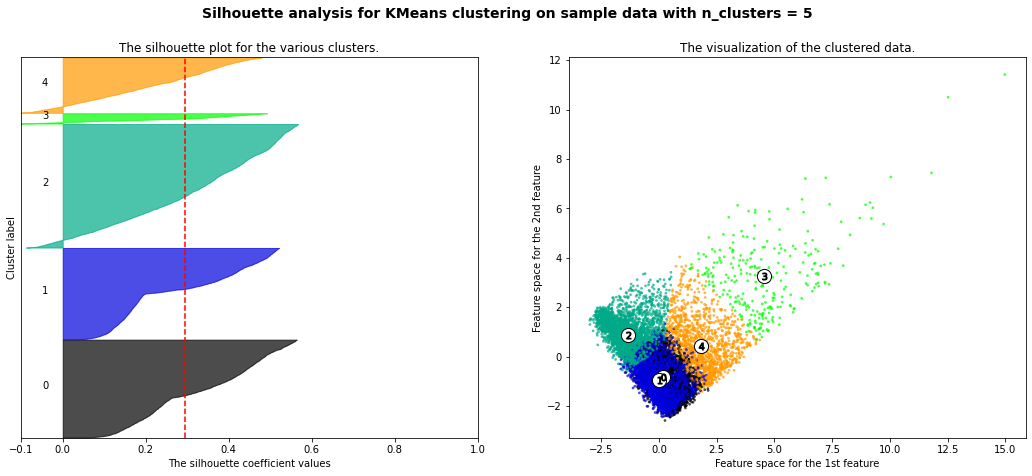

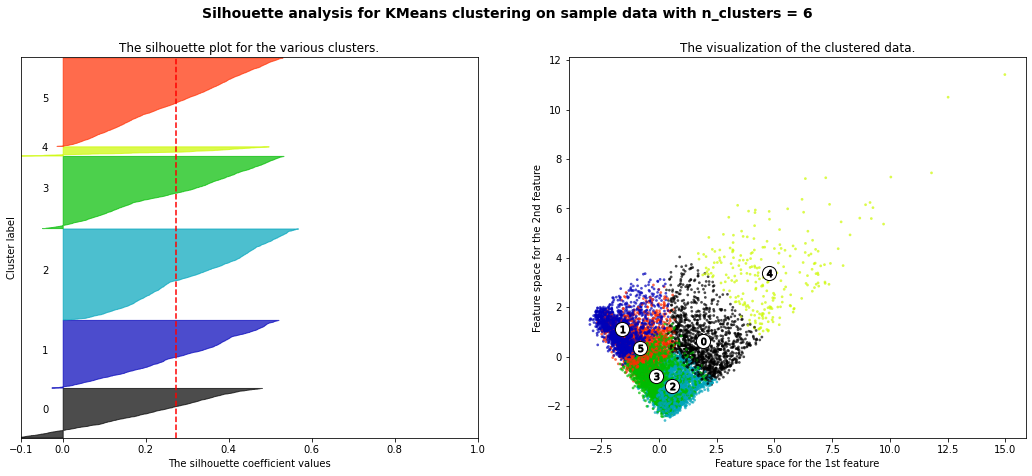

In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<span style=color:green>*Low silhouette coefficients indicate that the sample is close to the decision boundary between two neighboring clusters.*</span>

<span style=color:green>*In all silhouettes, clusters are above average silhouette scores. Best score is with 3 clusters.*</span>

<span style=color:green>*Some negative values indicate that those samples might have been assigned to the wrong cluster.*</span>

<span style=color:green>*Also from the thickness of the silhouette plot the cluster size can be visualized. When the n_clusters is equal to 2, all the plots are more or less of similar thickness and hence are of similar sizes.*</span>

<span style=color:green>From both K-means (elbow & silhouette) and hierarchical clustering, the same output with 3 clusters seems to be the best option.</span>